#  Loan Approval Data Analysis

##  Project Overview
This project focuses on cleaning, processing, and analyzing loan applicant data to understand the key factors that influence loan approval.  
Using Python libraries such as Pandas, NumPy, Matplotlib, and Seaborn, we perform data preprocessing and exploratory data analysis (EDA) to extract meaningful insights.

---

##  Objectives
- Clean and preprocess raw loan dataset  
- Handle missing values and duplicates  
- Convert categorical data into numerical format  
- Perform exploratory data analysis  
- Visualize patterns affecting loan approval  
- Generate insights for better decision-making


In [3]:
!pip install oracledb pandas


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ----------------------- ---------------- 1.0/1.8 MB 8.7 MB/s eta 0:00:01
   ---------------------------------------- 1.8/1.8 MB 6.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/3.5 MB ? eta -:--:--
   -------- ------------------------------- 0.8/3.5 MB 5.0 MB/s eta 0:00:01
   -------------------- ------------------- 1.8/3.5 MB 4.0 MB/s eta 0:00:01
   -------------------------- ------------- 2.4/3.5 MB 3.8 MB/s eta 0:00:01
   ----------------------------------- ---- 3.1/3.5 MB 3.7 MB/s eta 0:00:01
   ---------------------------------------- 3.5/3.5 MB 3.5 MB/s eta 0:00:00

  Attempting uninstall: typing_extensions

    Found existing installation: typing_extensions 4.12.2

    Uninstalling typing_extensions-4.12.2:

   ---------------------------------------- 0/4 [typing_extensions]
   ---------------------------------------- 0/4 [typing_extensions]
   ---------------------------------------- 0/

##  Importing Required Libraries

In this step, we install and import the necessary Python libraries for database connectivity, data manipulation, and visualization.

- **oracledb** → Connect to Oracle Database  
- **pandas** → Data manipulation  
- **numpy** → Numerical operations  
- **matplotlib & seaborn** → Data visualization


In [3]:
import pandas as pd
import oracledb
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##  Connecting to Oracle Database

The dataset is stored in an Oracle database.  
Here, we initialize the Oracle client and establish a connection to retrieve the loan dataset for analysis.


In [4]:


oracledb.init_oracle_client(lib_dir=r"C:\oracle\instantclient_21")

conn = oracledb.connect(
    user="hr",
    password="hr",
    dsn="localhost:1521/XE"
)

print("Oracle Connected Successfully")

df = pd.read_sql("SELECT * FROM loan_data", conn)
df.head()



Oracle Connected Successfully


C:\Users\23521\AppData\Local\Temp\ipykernel_12128\499230476.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT * FROM loan_data", conn)


,LOAN_ID,GENDER,MARRIED,DEPENDENTS,EDUCATION,SELF_EMPLOYED,APPLICANTINCOME,COAPPLICANTINCOME,LOANAMOUNT,LOAN_AMOUNT_TERM,CREDIT_HISTORY,PROPERTY_AREA,LOAN_STATUS
0,LP002443,Male,Yes,2,Graduate,No,3340,1710,150.0,360.0,0.0,Rural,N
1,LP002444,Male,No,1,Not Graduate,Yes,2769,1542,190.0,360.0,NaN,Semiurban,N
2,LP002446,Male,Yes,2,Not Graduate,No,2309,1255,125.0,360.0,0.0,Rural,N
3,LP002447,Male,Yes,2,Not Graduate,No,1958,1456,60.0,300.0,NaN,Urban,Y
4,LP002448,Male,Yes,0,Graduate,No,3948,1733,149.0,360.0,0.0,Rural,N


##  Initial Data Exploration

Understanding the dataset is the first step in data analysis.

We examine:
- Data types of each column  
- Missing values  
- Overall dataset structure  

This helps identify cleaning steps required before analysis.


In [6]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LOAN_ID            614 non-null    object 
 1   GENDER             601 non-null    object 
 2   MARRIED            611 non-null    object 
 3   DEPENDENTS         599 non-null    object 
 4   EDUCATION          614 non-null    object 
 5   SELF_EMPLOYED      582 non-null    object 
 6   APPLICANTINCOME    614 non-null    int64  
 7   COAPPLICANTINCOME  614 non-null    int64  
 8   LOANAMOUNT         592 non-null    float64
 9   LOAN_AMOUNT_TERM   600 non-null    float64
 10  CREDIT_HISTORY     564 non-null    float64
 11  PROPERTY_AREA      614 non-null    object 
 12  LOAN_STATUS        614 non-null    object 
dtypes: float64(3), int64(2), object(8)
memory usage: 62.5+ KB


LOAN_ID               0
GENDER               13
MARRIED               3
DEPENDENTS           15
EDUCATION             0
SELF_EMPLOYED        32
APPLICANTINCOME       0
COAPPLICANTINCOME     0
LOANAMOUNT           22
LOAN_AMOUNT_TERM     14
CREDIT_HISTORY       50
PROPERTY_AREA         0
LOAN_STATUS           0
dtype: int64

In [18]:
categorical_cols = [
    'GENDER', 'MARRIED', 'DEPENDENTS',
    'EDUCATION', 'SELF_EMPLOYED',
    'PROPERTY_AREA', 'LOAN_AMOUNT_TERM',
    'CREDIT_HISTORY'
]


##  Handling Missing Values

Real-world datasets often contain incomplete information.

### Strategy Used:
- Categorical columns → Filled with **mode** (most frequent value)  
- Numerical columns → Filled with **median** to reduce outlier impact  

This ensures the dataset remains consistent without losing important records.


In [21]:
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mode()[0])

In [22]:
df.head()

,LOAN_ID,GENDER,MARRIED,DEPENDENTS,EDUCATION,SELF_EMPLOYED,APPLICANTINCOME,COAPPLICANTINCOME,LOANAMOUNT,LOAN_AMOUNT_TERM,CREDIT_HISTORY,PROPERTY_AREA,LOAN_STATUS
0,LP002443,Male,Yes,2,Graduate,No,3340,1710,150.0,360.0,0.0,Rural,N
1,LP002444,Male,No,1,Not Graduate,Yes,2769,1542,190.0,360.0,1.0,Semiurban,N
2,LP002446,Male,Yes,2,Not Graduate,No,2309,1255,125.0,360.0,0.0,Rural,N
3,LP002447,Male,Yes,2,Not Graduate,No,1958,1456,60.0,300.0,1.0,Urban,Y
4,LP002448,Male,Yes,0,Graduate,No,3948,1733,149.0,360.0,0.0,Rural,N


In [28]:
df['LOANAMOUNT'] = df['LOANAMOUNT'].fillna(df['LOANAMOUNT'].median())

In [29]:
df.head()

,LOAN_ID,GENDER,MARRIED,DEPENDENTS,EDUCATION,SELF_EMPLOYED,APPLICANTINCOME,COAPPLICANTINCOME,LOANAMOUNT,LOAN_AMOUNT_TERM,CREDIT_HISTORY,PROPERTY_AREA,LOAN_STATUS
0,LP002443,Male,Yes,2,Graduate,No,3340,1710,150.0,360.0,0.0,Rural,N
1,LP002444,Male,No,1,Not Graduate,Yes,2769,1542,190.0,360.0,1.0,Semiurban,N
2,LP002446,Male,Yes,2,Not Graduate,No,2309,1255,125.0,360.0,0.0,Rural,N
3,LP002447,Male,Yes,2,Not Graduate,No,1958,1456,60.0,300.0,1.0,Urban,Y
4,LP002448,Male,Yes,0,Graduate,No,3948,1733,149.0,360.0,0.0,Rural,N


##  Removing Duplicate Records

Duplicate entries can distort analysis results.  
We remove duplicate rows to maintain data accuracy and reliability.


In [30]:
df.drop_duplicates(inplace=True)

In [31]:
df.duplicated().sum()

np.int64(0)

In [33]:
df['DEPENDENTS'] = df['DEPENDENTS'].replace('3+', 3)
df['DEPENDENTS'] = df['DEPENDENTS'].astype(int)

In [34]:
df.head()

,LOAN_ID,GENDER,MARRIED,DEPENDENTS,EDUCATION,SELF_EMPLOYED,APPLICANTINCOME,COAPPLICANTINCOME,LOANAMOUNT,LOAN_AMOUNT_TERM,CREDIT_HISTORY,PROPERTY_AREA,LOAN_STATUS
0,LP002443,Male,Yes,2,Graduate,No,3340,1710,150.0,360.0,0.0,Rural,N
1,LP002444,Male,No,1,Not Graduate,Yes,2769,1542,190.0,360.0,1.0,Semiurban,N
2,LP002446,Male,Yes,2,Not Graduate,No,2309,1255,125.0,360.0,0.0,Rural,N
3,LP002447,Male,Yes,2,Not Graduate,No,1958,1456,60.0,300.0,1.0,Urban,Y
4,LP002448,Male,Yes,0,Graduate,No,3948,1733,149.0,360.0,0.0,Rural,N


In [35]:
df.tail()

,LOAN_ID,GENDER,MARRIED,DEPENDENTS,EDUCATION,SELF_EMPLOYED,APPLICANTINCOME,COAPPLICANTINCOME,LOANAMOUNT,LOAN_AMOUNT_TERM,CREDIT_HISTORY,PROPERTY_AREA,LOAN_STATUS
609,LP002978,Female,No,0,Graduate,No,2900,0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3,Graduate,No,4106,0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0,133.0,360.0,0.0,Semiurban,N


##  Feature Engineering

To improve analysis:

- Converted `DEPENDENTS` from categorical to numerical values  
- Encoded `LOAN_STATUS` (Y → 1, N → 0) for easier analysis  
- Created a new feature **TOTALINCOME** by combining applicant and coapplicant income  

Feature engineering helps reveal deeper relationships within the data.


In [37]:
df['LOAN_STATUS'] = df['LOAN_STATUS'].map({'Y': 1, 'N': 0})

In [38]:
df.head()

,LOAN_ID,GENDER,MARRIED,DEPENDENTS,EDUCATION,SELF_EMPLOYED,APPLICANTINCOME,COAPPLICANTINCOME,LOANAMOUNT,LOAN_AMOUNT_TERM,CREDIT_HISTORY,PROPERTY_AREA,LOAN_STATUS
0,LP002443,Male,Yes,2,Graduate,No,3340,1710,150.0,360.0,0.0,Rural,0
1,LP002444,Male,No,1,Not Graduate,Yes,2769,1542,190.0,360.0,1.0,Semiurban,0
2,LP002446,Male,Yes,2,Not Graduate,No,2309,1255,125.0,360.0,0.0,Rural,0
3,LP002447,Male,Yes,2,Not Graduate,No,1958,1456,60.0,300.0,1.0,Urban,1
4,LP002448,Male,Yes,0,Graduate,No,3948,1733,149.0,360.0,0.0,Rural,0


In [39]:
df['TOTALINCOME'] = df['APPLICANTINCOME'] + df['COAPPLICANTINCOME'] 


In [40]:
df.head()

,LOAN_ID,GENDER,MARRIED,DEPENDENTS,EDUCATION,SELF_EMPLOYED,APPLICANTINCOME,COAPPLICANTINCOME,LOANAMOUNT,LOAN_AMOUNT_TERM,CREDIT_HISTORY,PROPERTY_AREA,LOAN_STATUS,TOTALINCOME
0,LP002443,Male,Yes,2,Graduate,No,3340,1710,150.0,360.0,0.0,Rural,0,5050
1,LP002444,Male,No,1,Not Graduate,Yes,2769,1542,190.0,360.0,1.0,Semiurban,0,4311
2,LP002446,Male,Yes,2,Not Graduate,No,2309,1255,125.0,360.0,0.0,Rural,0,3564
3,LP002447,Male,Yes,2,Not Graduate,No,1958,1456,60.0,300.0,1.0,Urban,1,3414
4,LP002448,Male,Yes,0,Graduate,No,3948,1733,149.0,360.0,0.0,Rural,0,5681


##  Final Dataset Verification

After cleaning and transformation, we recheck:

- Data types  
- Missing values  
- Overall structure  

The cleaned dataset is then exported as a CSV file for future use.


In [41]:
df.info()
df.isnull().sum()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LOAN_ID            614 non-null    object 
 1   GENDER             614 non-null    object 
 2   MARRIED            614 non-null    object 
 3   DEPENDENTS         614 non-null    int64  
 4   EDUCATION          614 non-null    object 
 5   SELF_EMPLOYED      614 non-null    object 
 6   APPLICANTINCOME    614 non-null    int64  
 7   COAPPLICANTINCOME  614 non-null    int64  
 8   LOANAMOUNT         614 non-null    float64
 9   LOAN_AMOUNT_TERM   614 non-null    float64
 10  CREDIT_HISTORY     614 non-null    float64
 11  PROPERTY_AREA      614 non-null    object 
 12  LOAN_STATUS        614 non-null    int64  
 13  TOTALINCOME        614 non-null    int64  
dtypes: float64(3), int64(5), object(6)
memory usage: 67.3+ KB


,LOAN_ID,GENDER,MARRIED,DEPENDENTS,EDUCATION,SELF_EMPLOYED,APPLICANTINCOME,COAPPLICANTINCOME,LOANAMOUNT,LOAN_AMOUNT_TERM,CREDIT_HISTORY,PROPERTY_AREA,LOAN_STATUS,TOTALINCOME
0,LP002443,Male,Yes,2,Graduate,No,3340,1710,150.0,360.0,0.0,Rural,0,5050
1,LP002444,Male,No,1,Not Graduate,Yes,2769,1542,190.0,360.0,1.0,Semiurban,0,4311
2,LP002446,Male,Yes,2,Not Graduate,No,2309,1255,125.0,360.0,0.0,Rural,0,3564
3,LP002447,Male,Yes,2,Not Graduate,No,1958,1456,60.0,300.0,1.0,Urban,1,3414
4,LP002448,Male,Yes,0,Graduate,No,3948,1733,149.0,360.0,0.0,Rural,0,5681


In [42]:
df.to_csv("cleaned_loan_data.csv", index=False)

##  Statistical Summary

We generate descriptive statistics to understand:

- Mean  
- Median  
- Standard deviation  
- Minimum & maximum values  

This provides a quick overview of numerical feature distributions.


In [45]:
df.describe()

,DEPENDENTS,APPLICANTINCOME,COAPPLICANTINCOME,LOANAMOUNT,LOAN_AMOUNT_TERM,CREDIT_HISTORY,LOAN_STATUS,TOTALINCOME
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.744300,5403.459283,1621.245928,145.752443,342.410423,0.855049,0.687296,7024.705212
std,1.009623,6109.041673,2926.248406,84.107233,64.428629,0.352339,0.463973,6458.663807
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,1442.000000
25%,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,4166.000000
50%,0.000000,3812.500000,1188.500000,128.000000,360.000000,1.000000,1.000000,5416.500000
75%,1.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,1.000000,7521.750000
max,3.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000,81000.000000


#  Exploratory Data Analysis (EDA)

EDA helps uncover hidden patterns and relationships in the dataset through visualizations.

We analyze:

- Loan approval distribution  
- Income patterns  
- Loan amount trends  
- Demographic impact on loan approval  
- Correlation between variables


##  Loan Approval Distribution

This visualization shows the proportion of approved vs rejected loans, helping us understand the dataset balance.


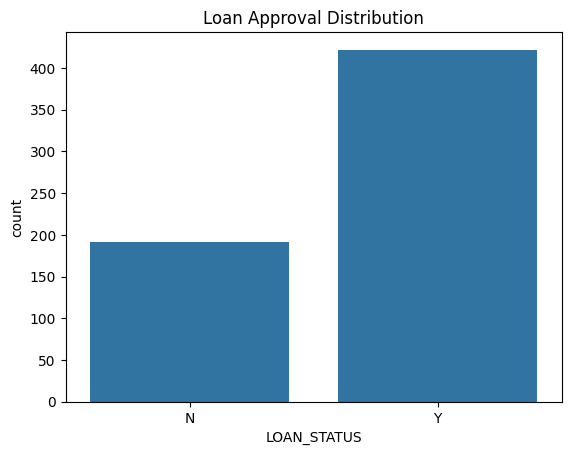

In [5]:
sns.countplot(x='LOAN_STATUS', data=df)
plt.title('Loan Approval Distribution')
plt.show()

In [49]:
df.groupby('LOAN_STATUS')[['APPLICANTINCOME',
                           'COAPPLICANTINCOME',
                           'CREDIT_HISTORY']].mean()


,APPLICANTINCOME,COAPPLICANTINCOME,CREDIT_HISTORY
LOAN_STATUS,,,
0,5446.078125,1877.807292,0.572917
1,5384.068720,1504.516588,0.983412


##  Income Distribution Analysis

These histograms display how applicant and coapplicant incomes are spread across the dataset.

Understanding income distribution helps identify financial patterns influencing loan approval.


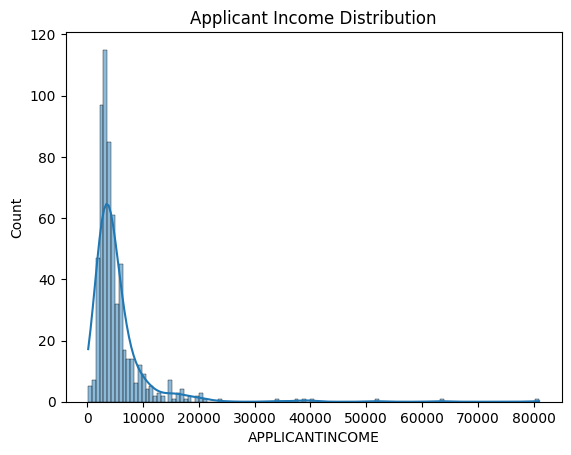

In [6]:
sns.histplot(df['APPLICANTINCOME'], kde=True)
plt.title('Applicant Income Distribution')
plt.show()

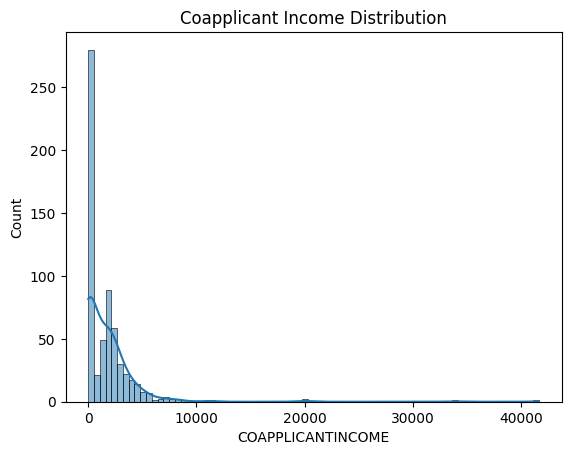

In [7]:
sns.histplot(df['COAPPLICANTINCOME'], kde=True)
plt.title('Coapplicant Income Distribution')
plt.show()

##  Loan Amount Distribution

This plot highlights the common loan ranges requested by applicants.


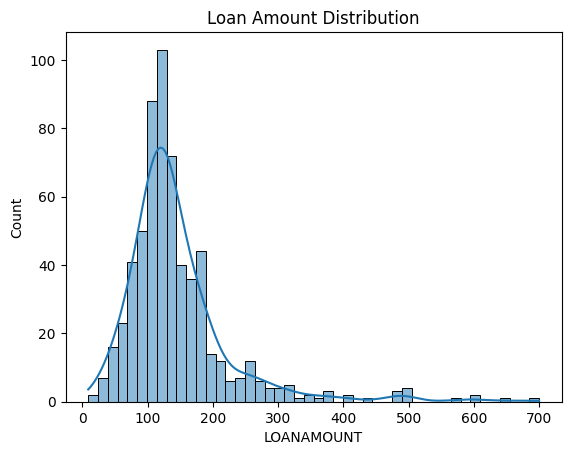

In [52]:
sns.histplot(df['LOANAMOUNT'], kde=True)
plt.title('Loan Amount Distribution')
plt.show()


##  Demographic Impact on Loan Approval

We analyze how factors like:

- Gender  
- Education  
- Marital status  
- Dependents  
- Credit history  

affect the likelihood of loan approval.


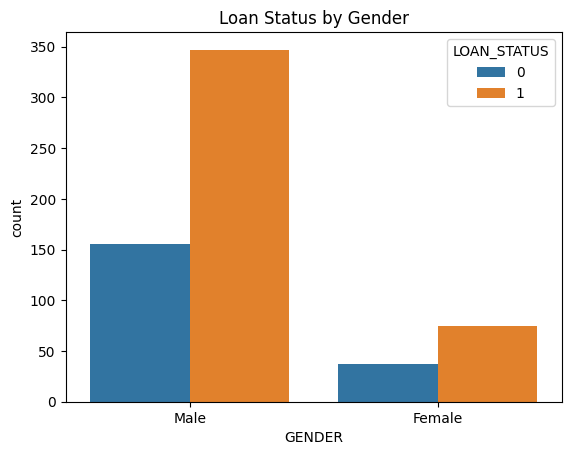

In [53]:
sns.countplot(x='GENDER', hue='LOAN_STATUS', data=df)
plt.title('Loan Status by Gender')
plt.show()

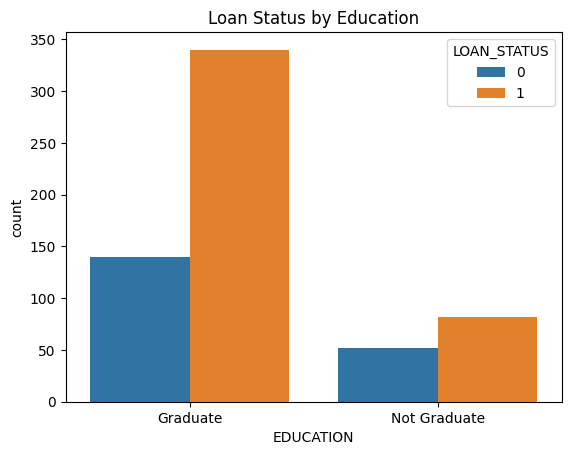

In [54]:
sns.countplot(x='EDUCATION', hue='LOAN_STATUS', data=df)
plt.title('Loan Status by Education')
plt.show()


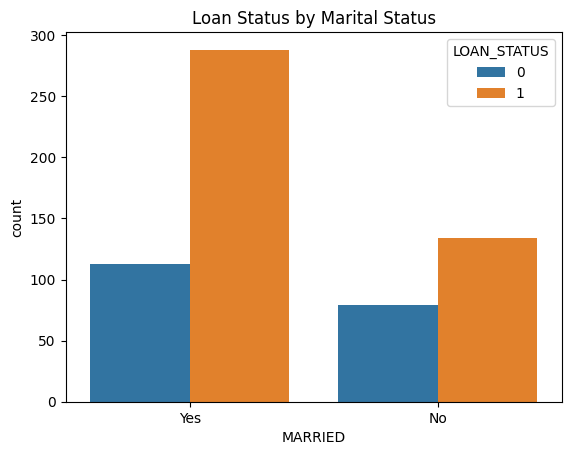

In [55]:
sns.countplot(x='MARRIED', hue='LOAN_STATUS', data=df)
plt.title('Loan Status by Marital Status')
plt.show()


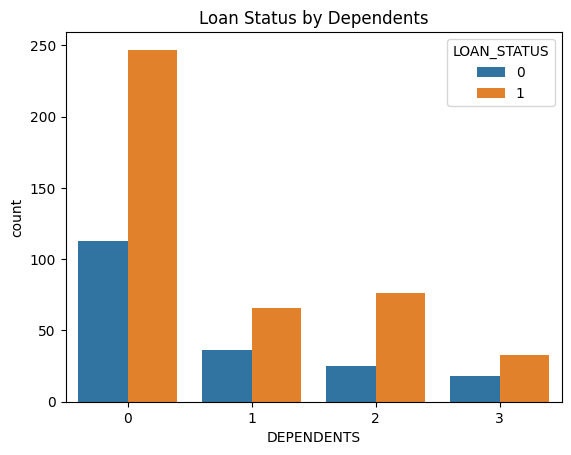

In [56]:
sns.countplot(x='DEPENDENTS', hue='LOAN_STATUS', data=df)
plt.title('Loan Status by Dependents')
plt.show()


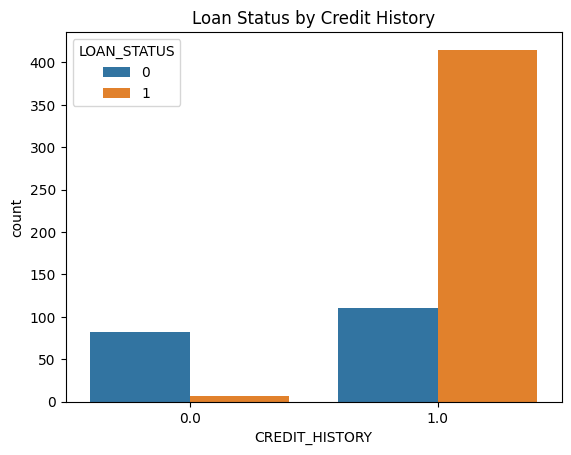

In [57]:
sns.countplot(x='CREDIT_HISTORY', hue='LOAN_STATUS', data=df)
plt.title('Loan Status by Credit History')
plt.show()


##  Correlation Analysis

The heatmap shows relationships between numerical variables.

Strong correlations help identify the most important factors influencing loan approval.


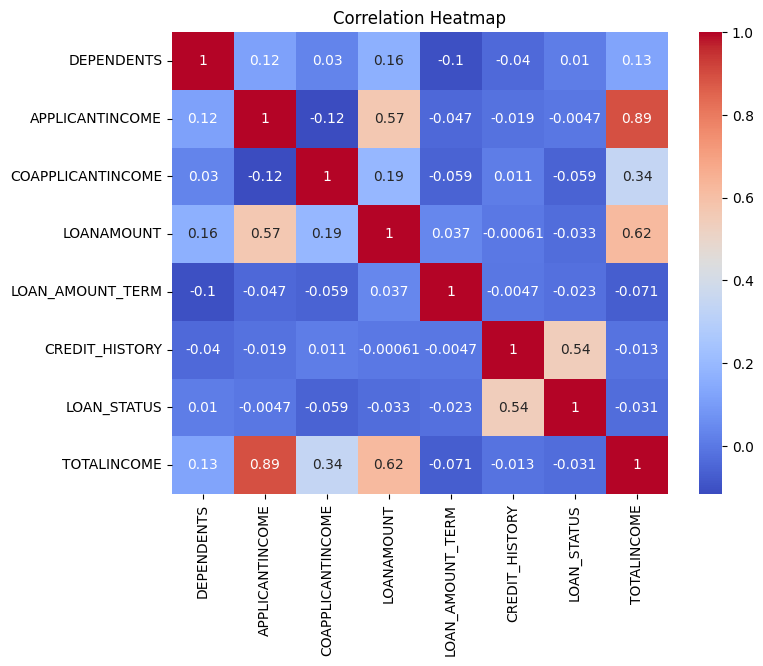

In [58]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True),
            annot=True,
            cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


##  Outlier Detection

Boxplots help visualize income and loan amount variations across loan status while detecting potential outliers.


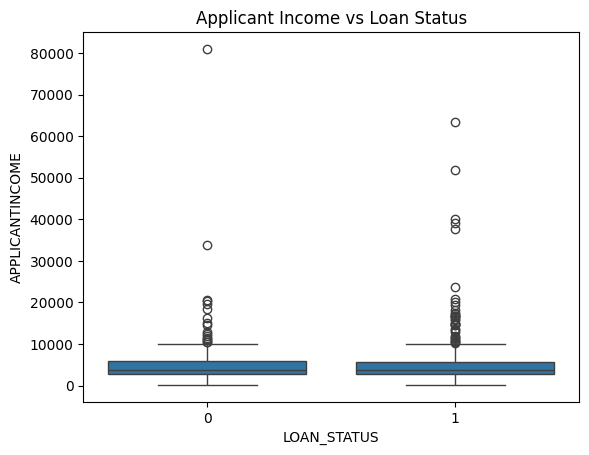

In [59]:
sns.boxplot(x='LOAN_STATUS', y='APPLICANTINCOME', data=df)
plt.title('Applicant Income vs Loan Status')
plt.show()

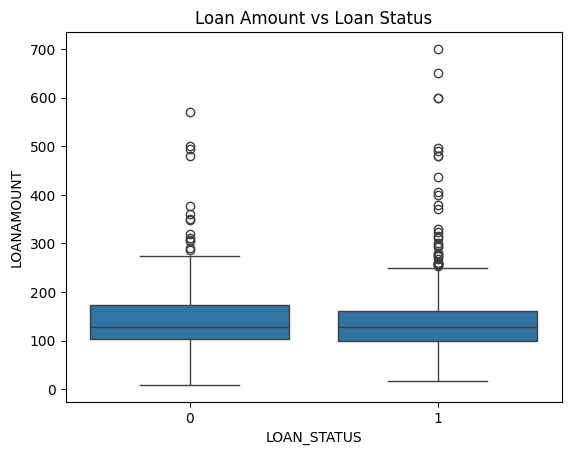

In [60]:
sns.boxplot(x='LOAN_STATUS', y='LOANAMOUNT', data=df)
plt.title('Loan Amount vs Loan Status')
plt.show()


#  Conclusion

From the analysis, we observed that:

- Credit history plays a major role in loan approval  
- Applicants with higher total income have better approval chances  
- Loan amount and repayment capability influence decisions  
- Certain demographic factors also impact approval rates  

This project demonstrates the importance of data cleaning, visualization, and exploratory analysis in extracting actionable insights from financial datasets.


##  Future Improvements
- Build a Power BI Dashboard for this Project
- Build a Machine Learning model to predict loan approval  
- Perform feature selection  
- Optimize data preprocessing  
- Deploy a prediction system
